# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 독립변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 종속변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_boston = pd.read_csv("boston_house.csv", index_col=0)
boston = df_boston.drop('MEDV', axis=1)
target = df_boston.pop('MEDV')

In [3]:
X = boston.values
y = target.values

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [8]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [11]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 13ms/step - loss: 570.6582 - mae: 22.0670 - mse: 570.6582 - val_loss: 589.6066 - val_mae: 22.4079 - val_mse: 589.6066
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 539.3998 - mae: 21.3075 - mse: 539.3998 - val_loss: 553.8239 - val_mae: 21.5300 - val_mse: 553.8239
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 500.9749 - mae: 20.3186 - mse: 500.9749 - val_loss: 506.9255 - val_mae: 20.3268 - val_mse: 506.9255
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 447.8376 - mae: 18.8871 - mse: 447.8376 - val_loss: 442.0815 - val_mae: 18.5505 - val_mse: 442.0815
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 378.7413 - mae: 16.8174 - mse: 378.7413 - val_loss: 361.1816 - val_mae: 16.1392 - val_mse: 361.1816
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 297.4314 - mae: 14.2731 - mse: 297.4314 - val_loss: 273.8651 

Epoch 98/500
12/12 [==============================] - 0s 3ms/step - loss: 19.5017 - mae: 3.0102 - mse: 19.5017 - val_loss: 16.1093 - val_mae: 3.0649 - val_mse: 16.1093
Epoch 99/500
12/12 [==============================] - 0s 3ms/step - loss: 19.5959 - mae: 2.9536 - mse: 19.5959 - val_loss: 15.1131 - val_mae: 2.9086 - val_mse: 15.1131
Epoch 100/500
12/12 [==============================] - 0s 3ms/step - loss: 19.2317 - mae: 2.9508 - mse: 19.2317 - val_loss: 15.4307 - val_mae: 2.9706 - val_mse: 15.4307
Epoch 101/500
12/12 [==============================] - 0s 3ms/step - loss: 19.3216 - mae: 2.9650 - mse: 19.3216 - val_loss: 15.0300 - val_mae: 2.9012 - val_mse: 15.0300
Epoch 102/500
12/12 [==============================] - 0s 3ms/step - loss: 18.9465 - mae: 2.9384 - mse: 18.9465 - val_loss: 15.6909 - val_mae: 3.0128 - val_mse: 15.6909
Epoch 103/500
12/12 [==============================] - 0s 3ms/step - loss: 18.9193 - mae: 2.9140 - mse: 18.9193 - val_loss: 15.0725 - val_mae: 2.9234 - val_m

Epoch 195/500
12/12 [==============================] - 0s 3ms/step - loss: 12.4745 - mae: 2.3845 - mse: 12.4745 - val_loss: 9.1861 - val_mae: 2.3098 - val_mse: 9.1861
Epoch 196/500
12/12 [==============================] - 0s 3ms/step - loss: 12.4593 - mae: 2.3927 - mse: 12.4593 - val_loss: 9.5003 - val_mae: 2.3943 - val_mse: 9.5003
Epoch 197/500
12/12 [==============================] - 0s 3ms/step - loss: 12.1635 - mae: 2.3437 - mse: 12.1635 - val_loss: 9.0750 - val_mae: 2.2927 - val_mse: 9.0750
Epoch 198/500
12/12 [==============================] - 0s 3ms/step - loss: 12.2000 - mae: 2.3483 - mse: 12.2000 - val_loss: 9.0827 - val_mae: 2.3177 - val_mse: 9.0827
Epoch 199/500
12/12 [==============================] - 0s 3ms/step - loss: 12.0820 - mae: 2.3352 - mse: 12.0820 - val_loss: 8.8782 - val_mae: 2.2834 - val_mse: 8.8782
Epoch 200/500
12/12 [==============================] - 0s 3ms/step - loss: 12.2041 - mae: 2.3480 - mse: 12.2041 - val_loss: 9.5482 - val_mae: 2.3917 - val_mse: 9.548

12/12 [==============================] - 0s 3ms/step - loss: 10.5631 - mae: 2.2015 - mse: 10.5631 - val_loss: 8.0448 - val_mae: 2.2309 - val_mse: 8.0448
Epoch 245/500
12/12 [==============================] - 0s 3ms/step - loss: 10.2853 - mae: 2.2140 - mse: 10.2853 - val_loss: 7.6291 - val_mae: 2.1177 - val_mse: 7.6291
Epoch 246/500
12/12 [==============================] - 0s 3ms/step - loss: 10.3462 - mae: 2.2058 - mse: 10.3462 - val_loss: 8.3932 - val_mae: 2.2853 - val_mse: 8.3932
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 10.5552 - mae: 2.2402 - mse: 10.5552 - val_loss: 7.5165 - val_mae: 2.1068 - val_mse: 7.5165
Epoch 248/500
12/12 [==============================] - 0s 3ms/step - loss: 10.1766 - mae: 2.2072 - mse: 10.1766 - val_loss: 7.9012 - val_mae: 2.1728 - val_mse: 7.9012
Epoch 249/500
12/12 [==============================] - 0s 3ms/step - loss: 10.1855 - mae: 2.2120 - mse: 10.1855 - val_loss: 7.4828 - val_mae: 2.0964 - val_mse: 7.4828
Epoch 250/50

Epoch 343/500
12/12 [==============================] - 0s 3ms/step - loss: 8.4917 - mae: 2.0546 - mse: 8.4917 - val_loss: 6.8732 - val_mae: 1.9869 - val_mse: 6.8732
Epoch 344/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5926 - mae: 2.0573 - mse: 8.5926 - val_loss: 6.7114 - val_mae: 2.0010 - val_mse: 6.7114
Epoch 345/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5899 - mae: 2.0666 - mse: 8.5899 - val_loss: 6.7047 - val_mae: 1.9811 - val_mse: 6.7047
Epoch 346/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5003 - mae: 2.0605 - mse: 8.5003 - val_loss: 6.6487 - val_mae: 1.9704 - val_mse: 6.6487
Epoch 347/500
12/12 [==============================] - 0s 3ms/step - loss: 8.4780 - mae: 2.0489 - mse: 8.4780 - val_loss: 6.8834 - val_mae: 1.9789 - val_mse: 6.8834
Epoch 348/500
12/12 [==============================] - 0s 3ms/step - loss: 8.4550 - mae: 2.0386 - mse: 8.4550 - val_loss: 6.6981 - val_mae: 1.9728 - val_mse: 6.6981
Epoch 349/

Epoch 393/500
12/12 [==============================] - 0s 3ms/step - loss: 8.0686 - mae: 2.0084 - mse: 8.0686 - val_loss: 7.2167 - val_mae: 2.0402 - val_mse: 7.2167
Epoch 394/500
12/12 [==============================] - 0s 3ms/step - loss: 8.1448 - mae: 2.0401 - mse: 8.1448 - val_loss: 6.9588 - val_mae: 2.0026 - val_mse: 6.9588
Epoch 395/500
12/12 [==============================] - 0s 3ms/step - loss: 7.9687 - mae: 1.9935 - mse: 7.9687 - val_loss: 6.7353 - val_mae: 1.9663 - val_mse: 6.7353
Epoch 396/500
12/12 [==============================] - 0s 3ms/step - loss: 8.0192 - mae: 1.9883 - mse: 8.0192 - val_loss: 6.7891 - val_mae: 1.9912 - val_mse: 6.7891
Epoch 397/500
12/12 [==============================] - 0s 3ms/step - loss: 7.9864 - mae: 2.0042 - mse: 7.9864 - val_loss: 6.6909 - val_mae: 1.9750 - val_mse: 6.6909
Epoch 398/500
12/12 [==============================] - 0s 3ms/step - loss: 8.0720 - mae: 2.0106 - mse: 8.0720 - val_loss: 6.9029 - val_mae: 1.9964 - val_mse: 6.9029
Epoch 399/

Epoch 443/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5498 - mae: 1.9439 - mse: 7.5498 - val_loss: 6.7493 - val_mae: 1.9658 - val_mse: 6.7493
Epoch 444/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5604 - mae: 1.9522 - mse: 7.5604 - val_loss: 6.7399 - val_mae: 1.9716 - val_mse: 6.7399
Epoch 445/500
12/12 [==============================] - 0s 3ms/step - loss: 7.6705 - mae: 1.9416 - mse: 7.6705 - val_loss: 6.7463 - val_mae: 1.9655 - val_mse: 6.7463
Epoch 446/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5123 - mae: 1.9370 - mse: 7.5123 - val_loss: 6.5886 - val_mae: 1.9602 - val_mse: 6.5886
Epoch 447/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5495 - mae: 1.9412 - mse: 7.5495 - val_loss: 6.6548 - val_mae: 1.9629 - val_mse: 6.6548
Epoch 448/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5157 - mae: 1.9413 - mse: 7.5157 - val_loss: 6.8030 - val_mae: 1.9964 - val_mse: 6.8030
Epoch 449/

Epoch 493/500
12/12 [==============================] - 0s 3ms/step - loss: 7.5245 - mae: 1.9255 - mse: 7.5245 - val_loss: 6.8951 - val_mae: 1.9991 - val_mse: 6.8951
Epoch 494/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2417 - mae: 1.9077 - mse: 7.2417 - val_loss: 6.7078 - val_mae: 1.9738 - val_mse: 6.7078
Epoch 495/500
12/12 [==============================] - 0s 3ms/step - loss: 7.2584 - mae: 1.9055 - mse: 7.2584 - val_loss: 6.6898 - val_mae: 1.9862 - val_mse: 6.6898
Epoch 496/500
12/12 [==============================] - 0s 3ms/step - loss: 7.4160 - mae: 1.9370 - mse: 7.4160 - val_loss: 6.8809 - val_mae: 1.9962 - val_mse: 6.8809
Epoch 497/500
12/12 [==============================] - 0s 3ms/step - loss: 7.4104 - mae: 1.9568 - mse: 7.4104 - val_loss: 6.8982 - val_mae: 2.0354 - val_mse: 6.8982
Epoch 498/500
12/12 [==============================] - 0s 4ms/step - loss: 7.3336 - mae: 1.9265 - mse: 7.3336 - val_loss: 6.9257 - val_mae: 2.0102 - val_mse: 6.9257
Epoch 499/

In [12]:
model.evaluate(X_test, y_test, verbose=0)

[7.377815246582031, 2.1334116458892822, 7.377815246582031]

In [13]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [14]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 7.38
R2 score: 0.91


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

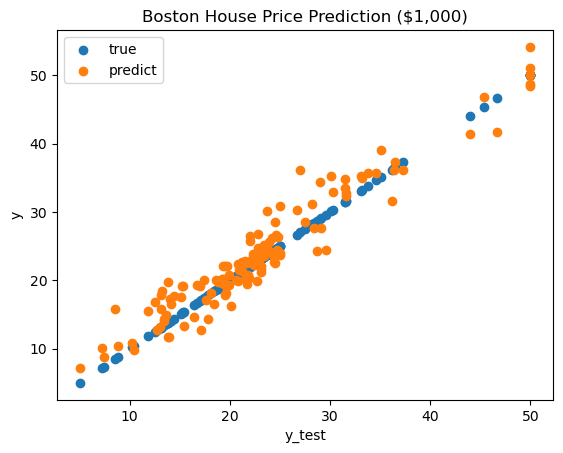

In [15]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

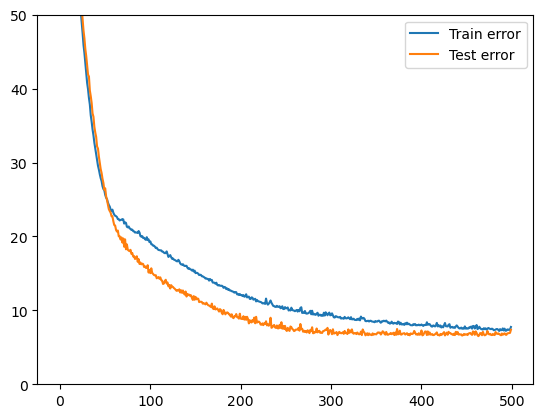

In [16]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [18]:
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [-10.10748546   5.61912277   0.14806672   3.26706543  -8.54796674
  17.73631489   0.83944464 -15.93335818   7.56063753  -7.17136402
  -8.67824074   3.70655562 -18.36698738]
Intercept: 
 27.294579440178683


In [21]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 24.34
R2 score: 0.71


In [22]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

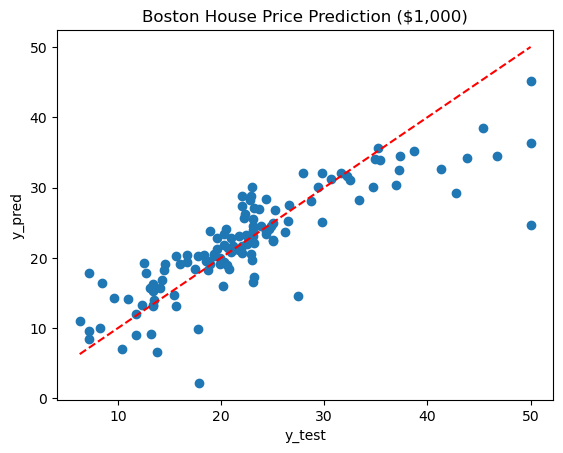

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [25]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화